In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

(20,)
(20,)


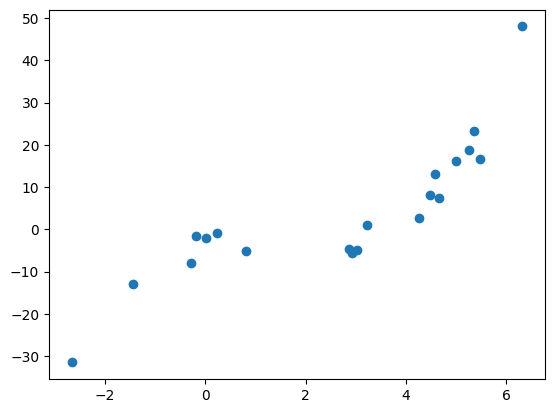

In [24]:
#lets create a random data set which is not linear

x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
print(x.shape)
print(y.shape)
plt.scatter(x,y)

0.7058836391594241

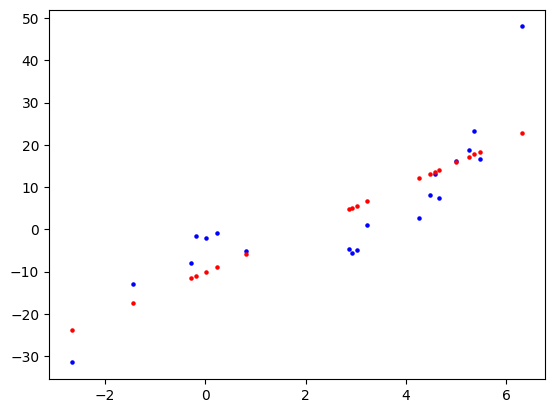

In [25]:
linear_reg = LinearRegression()
linear_reg.fit(x.reshape(-1,1),y)
acc = linear_reg.score(x.reshape(-1,1),y)
preds = linear_reg.predict(x.reshape(-1,1))
plt.scatter(x,y,c='b',s=5)
plt.scatter(sorted(x),sorted(preds),c='r',s=5)

acc = linear_reg.score(x.reshape(-1,1),y)
acc

In [26]:
plf = PolynomialFeatures(degree=1000)
x_poly = plf.fit_transform(x.reshape(-1,1))
poly_reg = LinearRegression()
poly_reg.fit(x_poly,y)
preds = poly_reg.predict(x_poly)
plt.scatter(x,y,c="b",s=5)
plt.plot(sorted(x),sorted(preds),c='r')
poly_reg.score(x_poly,y)

/home/zhalok/.local/lib/python3.10/site-packages/sklearn/preprocessing/_polynomial.py:440: RuntimeWarning: overflow encountered in multiply
  np.multiply(
/home/zhalok/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: Input X contains infinity or a value too large for dtype('float64').

/home/zhalok/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


0.9851484883873128

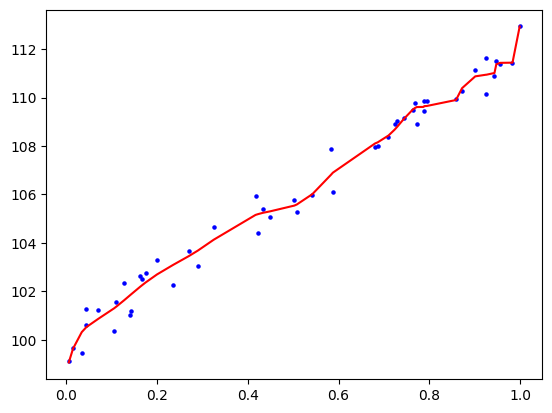

In [20]:
ridge_reg = Ridge(alpha=0,max_iter=1000)
ridge_reg.fit(x_poly,y)
preds = ridge_reg.predict(x_poly)

plt.scatter(x,y,c="b",s=5)
plt.plot(sorted(x),sorted(preds),c='r')

ridge_reg.score(x_poly,y)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_poly,y)



Training Accurcay: 0.9881935349564652
Testing Accuracy -69680227368.15306


/home/zhalok/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


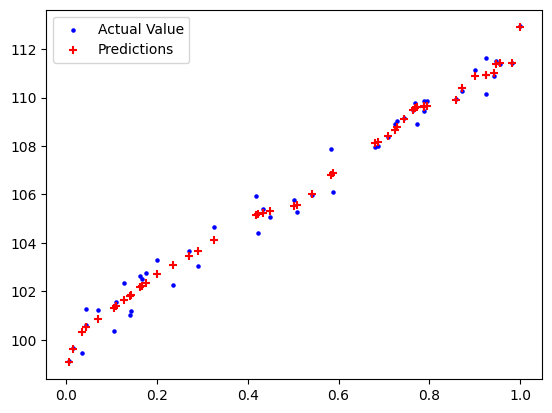

In [23]:
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(x_train,y_train)

train_acc = ridge_reg.score(x_train,y_train)
test_acc = ridge_reg.score(x_test,y_test)

print("Training Accurcay:",train_acc)
print("Testing Accuracy",test_acc)

plt.scatter(x,y,c='b',s=5)
plt.scatter(sorted(x),sorted(preds),c='r',marker="+")
plt.legend(["Actual Value","Predictions"])